<a href="https://colab.research.google.com/github/rajdeepbanerjee-git/JNCLectures_Intro_to_ML/blob/main/Week11/My_NN_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x = np.array([ [0, 1], [1, 0], [1, 1],[0, 0] ]).T
y = np.array([[1], [1], [0], [0]]).T
print(x.shape,y.shape)

(2, 4) (1, 4)


In [3]:
num_input = 2
num_hidden = 5
num_output = 1

In [4]:
W1 = np.random.randn(num_hidden, num_input)
b1 = np.zeros((num_hidden,1))

In [5]:
print(W1,b1)

[[-0.76758523  1.90457061]
 [-2.03277398 -0.19012239]
 [ 1.02480597 -0.01933403]
 [ 0.30260045 -0.72181325]
 [-1.42555246 -1.06089025]] [[0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [6]:
W2 = np.random.randn (num_output, num_hidden)
b2 = np.zeros((num_output,1))
print(W2,b2)

[[ 0.92932708  2.09209253  1.11143062 -1.05019896 -0.65750132]] [[0.]]


In [7]:
def sigmoid(z):
    return 1 / (1+np.exp(-z))

In [8]:
def sigmoid_derivative(z):
    return np.exp(-z)/((1+np.exp(-z))**2)

In [9]:
def forward_prop(x,W1,W2):
    z1 = np.dot(W1,x) + b1
    #print(z1.shape)
    h1 = sigmoid(z1)
    #print(h1.shape)
    z2 = np.dot(W2,h1) + b2
    #print(z2.shape)
    y_hat = sigmoid(z2)
    #print(y_hat.shape)

    return z1,h1,z2,y_hat

In [10]:
def backword_prop(y_hat, z1, h1, z2):

    dz2 = np.multiply((y_hat-y),sigmoid_derivative(z2))
    dW2 = np.dot(dz2, h1.T)
    dh1 = np.dot(W2.T, dz2)
    dz1 = np.multiply(dh1, sigmoid_derivative(z1))
    dW1 = np.dot(dz1, x.T)

    return dW1, dW2

In [11]:
def cost_function(y, y_hat):
    square = ((y_hat-y)**2)
    J = 0.5*(square.sum())

    return J

In [12]:
alpha = 0.01
num_iterations = 5000

In [13]:
cost = []
for i in range(num_iterations):

    #perform forward propagation and predict output
    z1,h1,z2,y_hat = forward_prop(x,W1,W2)

    #perform backward propagation and calculate gradients
    dW1, dW2 = backword_prop(y_hat, z1, h1, z2)

    #update the weights
    W1 = W1 -alpha * dW1
    W2 = W2 -alpha * dW2

    #compute cost
    c = cost_function(y, y_hat)
    #print(c)
    #store the cost
    cost.append(c)

Text(0, 0.5, 'Cost')

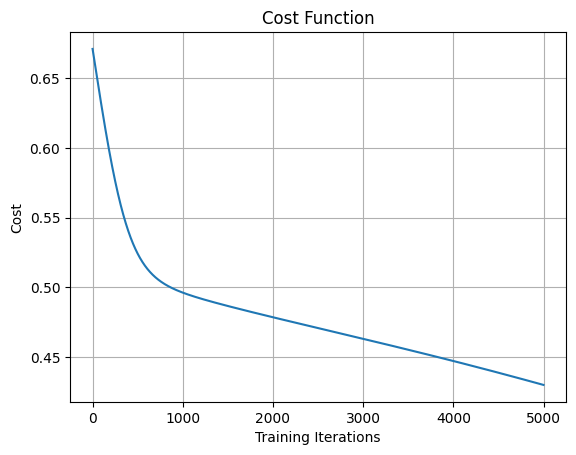

In [14]:
plt.grid()
plt.plot(range(num_iterations),cost)

plt.title('Cost Function')
plt.xlabel('Training Iterations')
plt.ylabel('Cost')

#### Implementation with tensorflow

In [15]:
import tensorflow as tf

In [53]:
W1_tf = tf.Variable(initial_value = tf.random.uniform(shape = (num_input, num_hidden)))
W2_tf = tf.Variable(initial_value = tf.random.uniform(shape = (num_hidden, num_output)))

In [54]:
def model(inputs):
  return tf.sigmoid(tf.matmul(tf.sigmoid(tf.matmul(inputs, W1_tf)), W2_tf))

In [34]:
x = x.astype(np.float32)
y = y.astype(np.float32)

In [52]:
# checking forward pass ... note shapes
model(x.T)

<tf.Tensor: shape=(4, 1), dtype=float32, numpy=
array([[0.7839085 ],
       [0.7839915 ],
       [0.8186132 ],
       [0.73556083]], dtype=float32)>

In [55]:
def square_loss(targets, predictions):
  per_sample_losses = tf.square(targets - predictions)
  return tf.reduce_mean(per_sample_losses)

In [56]:
# check
square_loss(y, model(x.T))

<tf.Tensor: shape=(), dtype=float32, numpy=0.36421496>

In [59]:
learning_rate = 0.01

def training_step(inputs, targets):
  with tf.GradientTape(persistent=True) as tape:
    predictions = model(inputs)
    loss = square_loss(predictions, targets)
  grad_loss_wrt_W1 = tape.gradient(loss, W1_tf)
  grad_loss_wrt_W2 = tape.gradient(loss, W2_tf)
  W1_tf.assign_sub(grad_loss_wrt_W1 * learning_rate)
  W2_tf.assign_sub(grad_loss_wrt_W2 * learning_rate)

  return loss


In [61]:
losses = []

for step in range(num_iterations):
  loss = training_step(inputs = x.T, targets = y)
  losses.append(loss)

Text(0, 0.5, 'Cost')

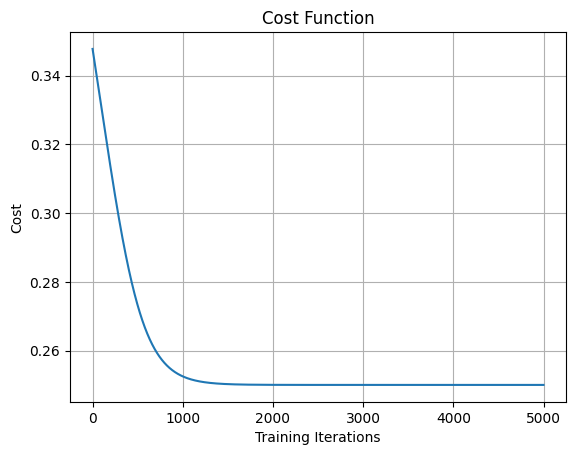

In [62]:
plt.grid()
plt.plot(range(num_iterations), losses)

plt.title('Cost Function')
plt.xlabel('Training Iterations')
plt.ylabel('Cost')